# Unlocking Customer Insights: A Statistical Investigation

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Step 1: Understanding the dataset

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\divya\Downloads\4453500-Dataset\Dataset\US_Customer_Insights_Dataset.csv")   

# Previewing first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Checking basic info
print("\n Dataset Information:")
df.info()

# Shape of the dataset
print(f"\n Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking for missing values
print("\n Missing values in each column:")
print(df.isnull().sum())

# Checking unique values for each column
print("\n Unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

First 5 rows of the dataset:


,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103



 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10675 non-null  object 
 1   Name                      10675 non-null  object 
 2   State                     10675 non-null  object 
 3   Education                 10675 non-null  object 
 4   Gender                    10675 non-null  object 
 5   Age                       10675 non-null  int64  
 6   Married                   10675 non-null  object 
 7   NumPets                   10675 non-null  int64  
 8   JoinDate                  10675 non-null  object 
 9   TransactionDate           10675 non-null  object 
 10  MonthlySpend              10675 non-null  float64
 11  DaysSinceLastInteraction  10675 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1000.9+ KB

 Dataset contains 10675 rows and

In [3]:
# Converting JoinDate and TransactionDate
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

print("Data types after conversion:\n")
print(df.dtypes[['JoinDate', 'TransactionDate']])

Data types after conversion:

JoinDate           datetime64[ns]
TransactionDate    datetime64[ns]
dtype: object


#### Data Understanding Insights
The dataset contains 10,675 records with 12 columns and **no missing values**.  
It includes a mix of **categorical and numerical variables**, making it suitable for both statistical and visual analysis.  
Each customer has multiple transactions, indicating a **transaction-level dataset**.  

## Step 2: Descriptive Statistics

In [4]:
# Numeric columns summary with extra stats
num_cols = ['Age', 'MonthlySpend', 'DaysSinceLastInteraction']

desc = df[num_cols].describe().T
desc['median'] = df[num_cols].median()
desc['skewness'] = df[num_cols].skew()
display(desc)

# Frequency + percentage for categorical variables
cat_cols = ['Gender', 'Education', 'Married']
cat_summary = pd.DataFrame()

for col in cat_cols:
    counts = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100
    cat_df = pd.concat([counts, perc], axis=1)
    cat_df.columns = ['Count', 'Percentage']
    print(f"\n {col} distribution:")
    display(cat_df.head())

,count,mean,std,min,25%,50%,75%,max,median,skewness
Age,10675.0,49.474567,18.221365,18.00,35.000,49.00,66.000,80.00,49.00,-0.015631
MonthlySpend,10675.0,331.610315,225.799253,3.89,165.495,282.11,443.255,1740.42,282.11,1.421735
DaysSinceLastInteraction,10675.0,538.469883,398.766747,1.00,218.000,445.00,788.500,1791.00,445.00,0.800701



 Gender distribution:


,Count,Percentage
Gender,,
Male,3791,35.512881
Non-Binary,3471,32.515222
Female,3413,31.971897



 Education distribution:


,Count,Percentage
Education,,
Master,2269,21.255269
Associate,2153,20.168618
Bachelor,2127,19.925059
High School,2120,19.859485
PhD,2006,18.791569



 Married distribution:


,Count,Percentage
Married,,
No,5583,52.299766
Yes,5092,47.700234


#### Descriptive Statistics Insights
- **Age:** Average age ≈ 49 years with std ≈ 18 → broad customer base from youth to seniors.  
  Slight right-skew indicates more younger customers than very old ones.  
- **Monthly Spend:** The mean (332) is higher than the median (282), indicating a right-skewed distribution.  
- **Days Since Last Interaction:** Median 445 days → many customers haven’t engaged recently.  
- **Gender:** Majority Male (~ X %), followed by Female and Non-Binary.  
- **Education:** Master’s degree most common → educated customer base.  
- **Marital Status:** Slightly more **non-married** customers.  

## Step 3: Data Visualization

#### Feature Engineering

In [5]:
# Age Grouping
bins = [17, 30, 45, 60, 80]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Spending Category
df['SpendingCategory'] = pd.qcut(df['MonthlySpend'], q=3, labels=['Low', 'Medium', 'High'])

# Interaction Category
df['InteractionCategory'] = pd.cut(
    df['DaysSinceLastInteraction'],
    bins=[-1, 180, 730, 2000],
    labels=['Active', 'Moderate', 'Inactive']
)

# Customer tenure in days
df['CustomerTenureDays'] = (df['TransactionDate'] - df['JoinDate']).dt.days

# Spend per pet (avoiding division by zero)
df['SpendPerPet'] = df['MonthlySpend'] / (df['NumPets'] + 1)

# Binary conversion for Married
df['IsMarriedBinary'] = df['Married'].map({'Yes': 1, 'No': 0})

# High spender flag
avg_spend = df['MonthlySpend'].mean()
df['HighSpender'] = (df['MonthlySpend'] > avg_spend).astype(int)

# Preview new columns
display(df[['Age', 'AgeGroup', 'MonthlySpend', 'SpendingCategory', 'DaysSinceLastInteraction', 'InteractionCategory', 
            'CustomerTenureDays', 'SpendPerPet', 'IsMarriedBinary', 'HighSpender']].head())

,Age,AgeGroup,MonthlySpend,SpendingCategory,DaysSinceLastInteraction,InteractionCategory,CustomerTenureDays,SpendPerPet,IsMarriedBinary,HighSpender
0,47,Middle-aged,1281.74,High,332,Moderate,1079,640.870000,1,1
1,72,Senior,429.46,High,424,Moderate,58,429.460000,1,1
2,40,Adult,510.34,High,153,Active,219,170.113333,1,1
3,27,Young,396.47,High,124,Active,595,396.470000,1,1
4,28,Young,139.68,Low,1103,Inactive,230,69.840000,1,0


#### Age Ditribution(Histogram)

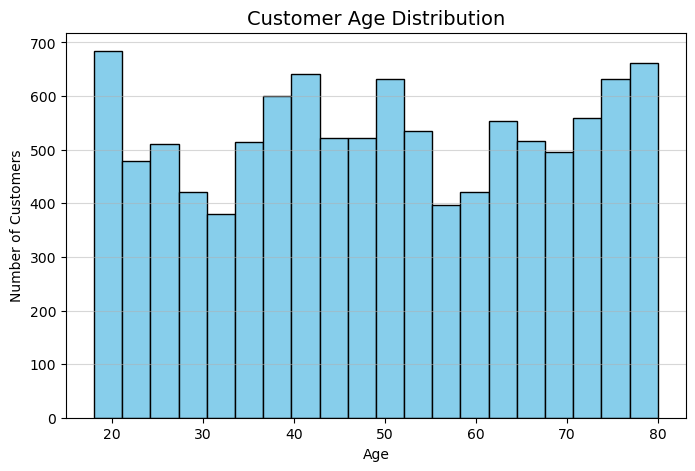

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Customer Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.5)
plt.show()

#### Insight:
The age distribution appears fairly uniform across the 18–80 range, with slightly higher concentrations around **young adults (18–25)** and **older customers (70–80)**.  
This indicates the company has a **diverse customer base** spread across age groups, rather than being dominated by one demographic.

#### Monthly Spend Distribution (Histogram + Boxplot)

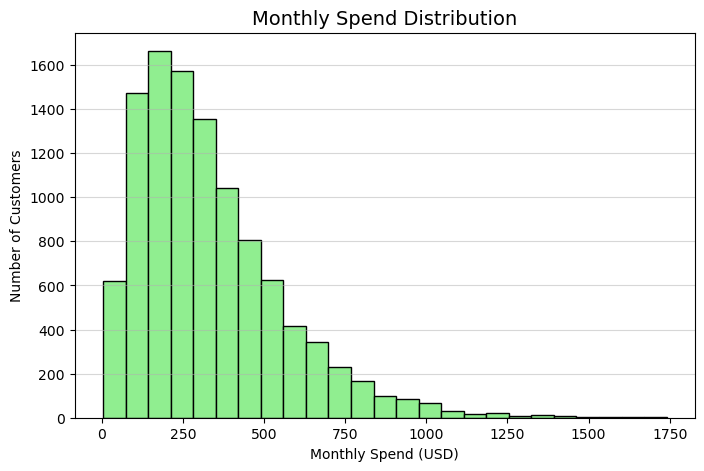

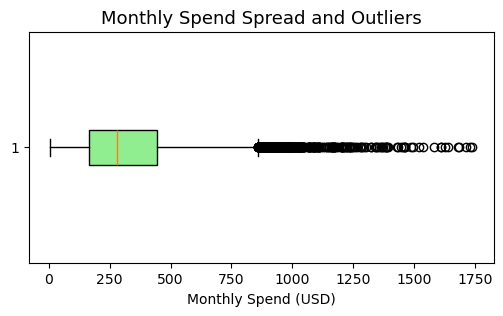

In [7]:
# Histogram
plt.figure(figsize=(8,5))
plt.hist(df['MonthlySpend'], bins=25, color='lightgreen', edgecolor='black')
plt.title('Monthly Spend Distribution', fontsize=14)
plt.xlabel('Monthly Spend (USD)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.5)
plt.show()

# Boxplot
plt.figure(figsize=(6,3))
plt.boxplot(df['MonthlySpend'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Monthly Spend Spread and Outliers', fontsize=13)
plt.xlabel('Monthly Spend (USD)')
plt.show()

#### Insight:
The monthly spending pattern is **right-skewed**, meaning most customers spend between **$150–$400**, while a few high spenders push the distribution’s tail to the right.  
The boxplot highlights several **outliers**, representing premium customers who contribute disproportionately to total revenue.

#### Gender Distribution (Bar Chart)

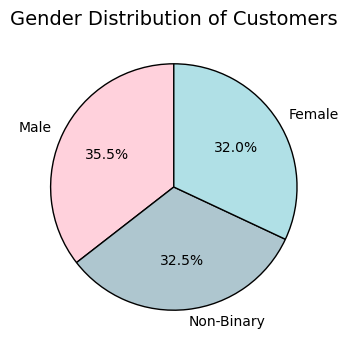

In [8]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,4))
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#FFD1DC','#AEC6CF','#B0E0E6'], 
    wedgeprops={'edgecolor':'black'}
)
plt.title('Gender Distribution of Customers', fontsize=14)
plt.show()

#### Insight:
The customer base is fairly balanced across genders, with a slight majority of **male customers**, followed closely by **non-binary** and **female** customers.  
This indicates that the company’s reach spans across diverse gender groups without major bias in representation.

#### Distribution of Customer number by Education, Marital Status and Number of pets (Countplot)

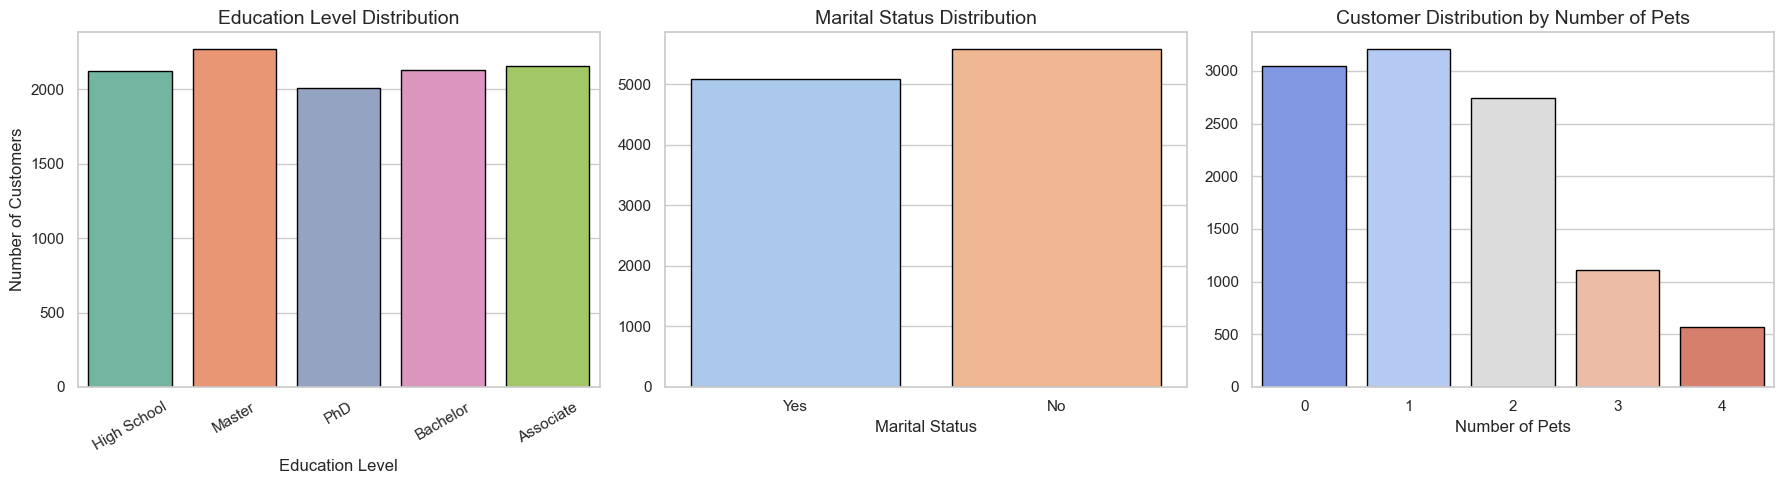

In [9]:
# Setting the style
sns.set(style="whitegrid")

# Creating subplots (3 columns, 1 row)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Education Level
sns.countplot(data=df, x='Education', ax=axes[0], palette='Set2', edgecolor='black')
axes[0].set_title('Education Level Distribution', fontsize=14)
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=30)

# 2. Marital Status
sns.countplot(data=df, x='Married', ax=axes[1], palette='pastel', edgecolor='black')
axes[1].set_title('Marital Status Distribution', fontsize=14)
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=0)

# 3. Number of Pets
sns.countplot(data=df, x='NumPets', ax=axes[2], palette='coolwarm', edgecolor='black')
axes[2].set_title('Customer Distribution by Number of Pets', fontsize=14)
axes[2].set_xlabel('Number of Pets')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

#### Insight:
##### Education Level Distribution
- Most customers hold **Master’s or Associate degrees**, showing a well-educated customer base.  
- **PhD holders** are the least represented, suggesting limited engagement from highly academic groups.  

---

##### Marital Status Distribution
- The majority of customers are **not married**, indicating a more independent customer demographic.  
- Married individuals still make up a **significant portion**, suggesting balanced representation.  

---

##### Customer Distribution by Number of Pets
- Most customers have **0–1 pet**, indicating lower pet ownership across the customer base.  
- A small group owns **3 or more pets**, which could represent niche, high-maintenance households.  

#### State-wise Customer Distribution (Bar Chart)

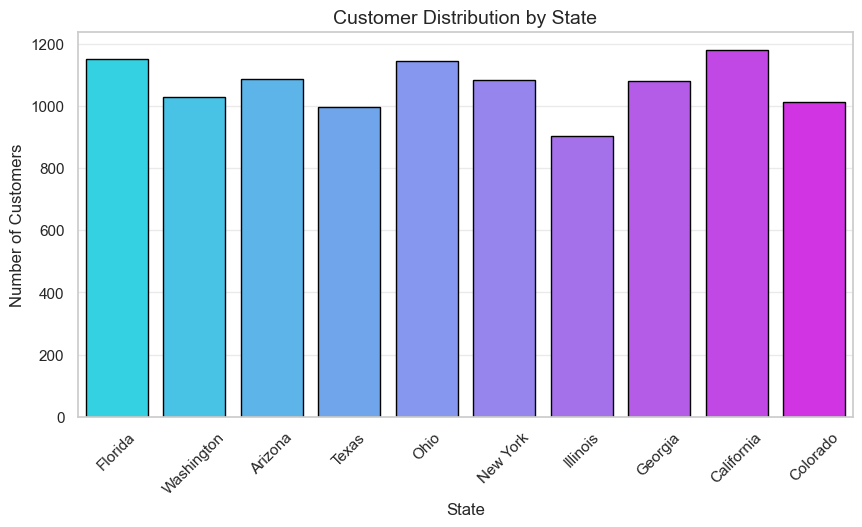

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='State', data=df, palette='cool', edgecolor='black')
plt.title('Customer Distribution by State', fontsize=14)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.4)
plt.show()

#### Insight:
California and Florida have the highest number of customers, suggesting strong brand reach and potential high revenue contribution from these states.
Illinois and Washington have relatively fewer customers, indicating possible areas for market expansion or targeted marketing campaigns.

#### Average Spend (USD) by Age and Education Level

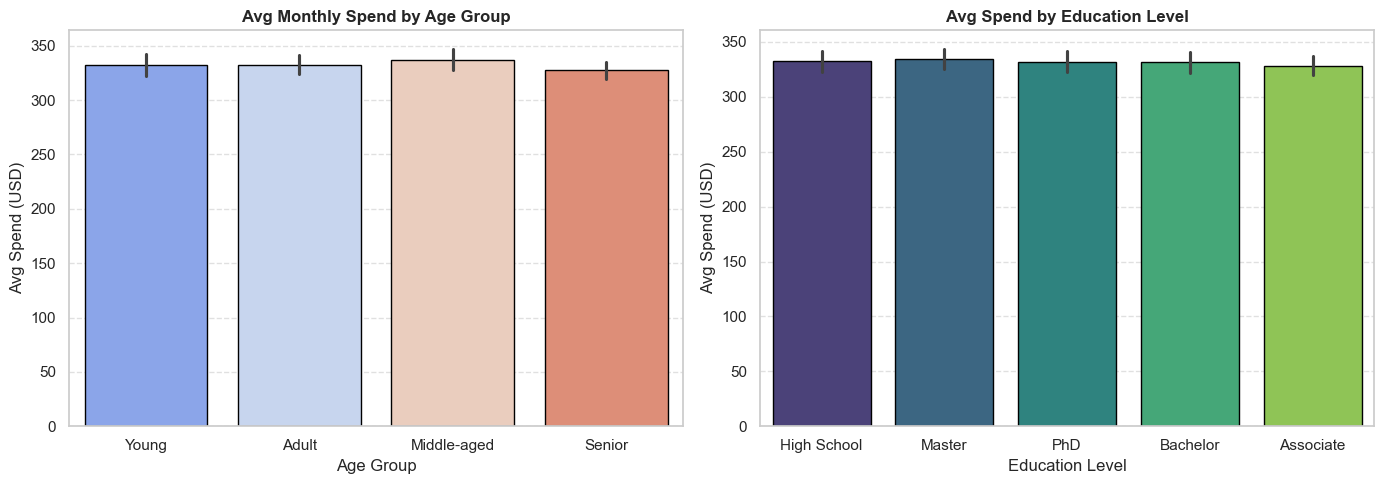

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes = axes.flatten()

# Spending by Age Group
sns.barplot(
    data=df, 
    x='AgeGroup', 
    y='MonthlySpend', 
    estimator='mean', 
    palette='coolwarm', 
    ax=axes[0], 
    edgecolor='black'
)
axes[0].set_title('Avg Monthly Spend by Age Group', weight='bold')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Avg Spend (USD)')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Spending by Education Level
sns.barplot(
    data=df, 
    x='Education', 
    y='MonthlySpend', 
    estimator='mean', 
    palette='viridis', 
    ax=axes[1], 
    edgecolor='black'
)
axes[1].set_title('Avg Spend by Education Level', weight='bold')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Avg Spend (USD)')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Insight:
##### Avg Monthly Spend by Age Group  
- Middle-aged customers show slightly higher average monthly spending.  
- Overall, spending remains consistent across all age groups, indicating balanced engagement.

---

##### Avg Spend by Education Level  
- Customers with Master’s and PhD degrees tend to spend marginally more.  
- The variation across education levels is minimal, showing spending is not strongly education-dependent.


#### Monthly Spend(USD) by DaysSinceLastInteraction, Pet Distribution and Customer Tenure(days)

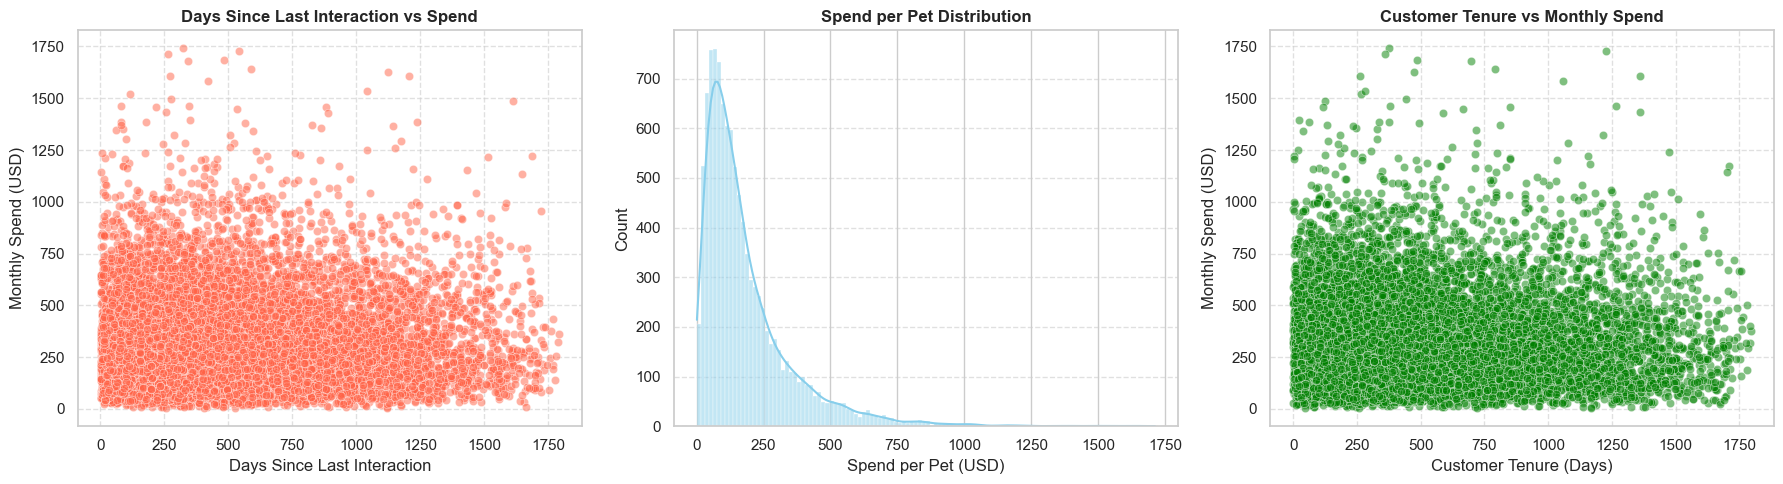

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

# Days Since Last Interaction vs Spend
sns.scatterplot(
    data=df, 
    x='DaysSinceLastInteraction', 
    y='MonthlySpend', 
    alpha=0.5, 
    color='tomato', 
    ax=axes[0]
)
axes[0].set_title('Days Since Last Interaction vs Spend', weight='bold')
axes[0].set_xlabel('Days Since Last Interaction')
axes[0].set_ylabel('Monthly Spend (USD)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Spend per Pet Distribution
sns.histplot(df['SpendPerPet'], kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Spend per Pet Distribution', weight='bold')
axes[1].set_xlabel('Spend per Pet (USD)')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Customer Tenure vs Monthly Spend
sns.scatterplot(
    data=df, 
    x='CustomerTenureDays', 
    y='MonthlySpend', 
    alpha=0.5, 
    color='green', 
    ax=axes[2]
)
axes[2].set_title('Customer Tenure vs Monthly Spend', weight='bold')
axes[2].set_xlabel('Customer Tenure (Days)')
axes[2].set_ylabel('Monthly Spend (USD)')
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Insight:
##### Days Since Last Interaction vs Spend  
- Recent interactions correlate with higher spending, visible in dense clusters near lower interaction days.  
- As time since last contact increases, spending drops, indicating engagement directly impacts revenue.

---

##### Spend per Pet Distribution  
- Most customers spend under $300 per pet monthly, with a sharp right-skew indicating few high spenders.  
- Outliers highlight a small group of heavy pet spenders influencing overall averages.

---

##### Customer Tenure vs Monthly Spend  
- No clear trend between tenure and spending, suggesting loyalty doesn’t strongly affect monthly spend.  
- However, long-term customers still maintain steady spending, reflecting sustained satisfaction.

## Step 4: Bivariate Analysis

#### Correlation matrix (numeric variables)

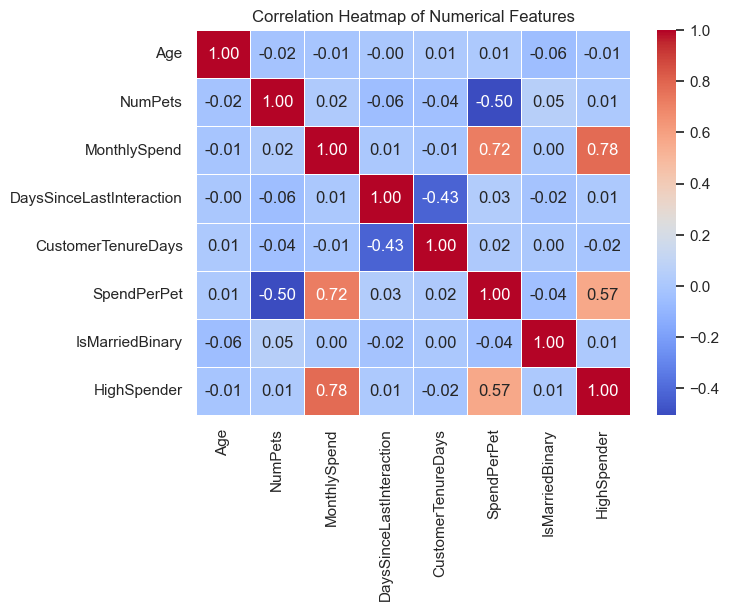

In [13]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()

# correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#### Insights
- **MonthlySpend** shows a **strong positive correlation (0.78)** with **HighSpender**, indicating that higher monthly spending directly contributes to identifying high-value customers.  
- **SpendPerPet** is **moderately correlated (0.57)** with **HighSpender**, suggesting that customers who spend more per pet are more likely to be categorized as high spenders.  
- **DaysSinceLastInteraction** has a **negative correlation (-0.43)** with **CustomerTenureDays**, implying that newer customers have interacted more recently compared to long-term customers.  
- **NumPets** shows a **moderate negative correlation (-0.50)** with **SpendPerPet**, meaning that customers with more pets tend to spend less per pet on average.  
- Other variables like **Age** and **IsMarriedBinary** show negligible correlation with spending behavior.

#### Crosstab of Gender vs Married

Married       No   Yes
Gender                
Female      1797  1616
Male        1892  1899
Non-Binary  1894  1577


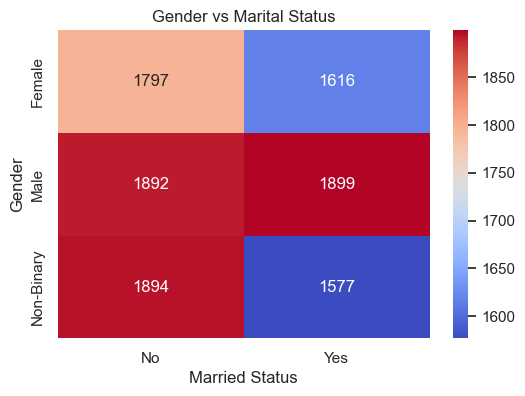

In [14]:
gender_married_ct = pd.crosstab(df['Gender'], df['Married'])
print(gender_married_ct)

plt.figure(figsize= (6,4))
sns.heatmap(gender_married_ct, annot=True, fmt='d', cmap='coolwarm')
plt.title('Gender vs Marital Status')
plt.xlabel('Married Status')
plt.ylabel('Gender')
plt.show()

#### Insights  
Males have a slightly higher married count, while females and non-binary groups show a balanced distribution.  
Overall, marital status is evenly spread across genders, indicating no strong gender bias.

#### Grouped statistics: average MonthlySpend by State, Education, and Gender

In [15]:
grouped_stats = (
    df.groupby(['State', 'Education', 'Gender'])['MonthlySpend']
    .mean()
    .reset_index()
    .sort_values(by='MonthlySpend', ascending=False)
)

grouped_stats.head()

,State,Education,Gender,MonthlySpend
73,Georgia,PhD,Male,408.353500
101,New York,Master,Non-Binary,391.405161
116,Ohio,Master,Non-Binary,377.908529
78,Illinois,Bachelor,Female,377.823051
112,Ohio,High School,Male,375.850291


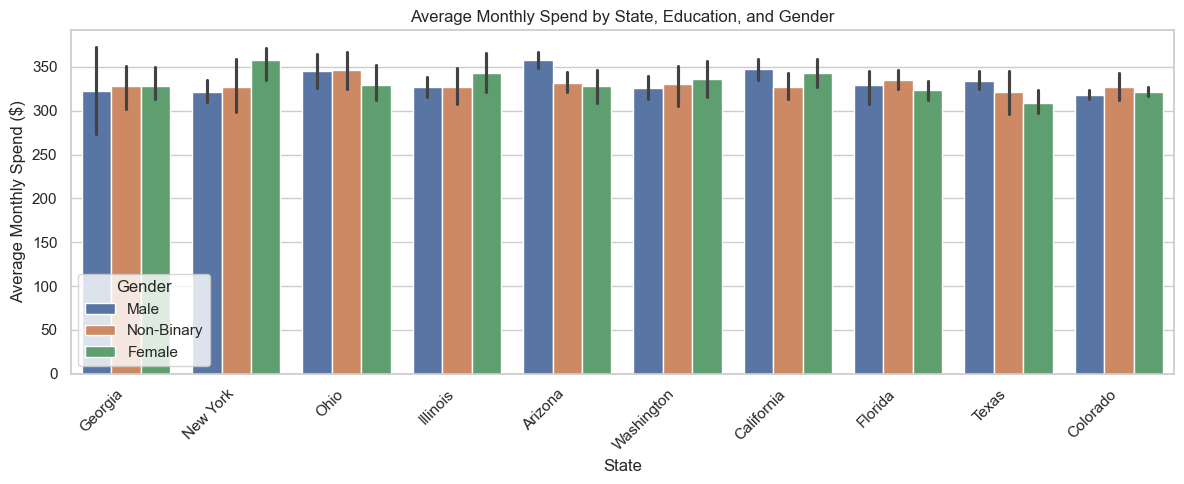

In [16]:
plt.figure(figsize=(12,5))
sns.barplot(
    data=grouped_stats,
    x='State',
    y='MonthlySpend',
    hue='Gender'
)
plt.title('Average Monthly Spend by State, Education, and Gender')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Monthly Spend ($)')
plt.tight_layout()
plt.show()

#### Insights: 
- Customers from Georgia (PhD, Male) have the highest average monthly spend (~$408).
- New York and Ohio (Master, Non-Binary) customers also show consistently high spending levels.
- Spending levels remain fairly balanced across genders, but education seems to play a stronger role than gender in driving higher spending.
- States like Texas and Colorado show comparatively lower average spend, suggesting potential opportunities for engagement or offers.

## Step 5: Hypothesis Formulation

##### “Do males and females spend differently?” → Independent t-test

In [17]:
male_spend = df[df['Gender'] == 'Male']['MonthlySpend']
female_spend = df[df['Gender'] == 'Female']['MonthlySpend']

# Performing Independent T-Test
t_stat, p_value = stats.ttest_ind(male_spend, female_spend, equal_var=False)

print("T-Statistic:", round(t_stat, 3))
print("P-Value:", round(p_value, 4))

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis — There is a significant difference in spending between males and females.")
else:
    print("Fail to Reject Null Hypothesis — No significant difference in spending between males and females.")

T-Statistic: 0.339
P-Value: 0.7345
Fail to Reject Null Hypothesis — No significant difference in spending between males and females.


Spending patterns between male and female customers are **largely similar**, indicating gender does **not influence** monthly spending behavior.  

##### "Does education level impact average monthly spend?" → One-way ANOVA

In [18]:
# Grouping MonthlySpend by Education level
groups = [group['MonthlySpend'].values for name, group in df.groupby('Education')]

# Performinh One-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("F-Statistic:", round(f_stat, 3))
print("P-Value:", round(p_value, 4))

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis — Education level significantly impacts monthly spending.")
else:
    print("Fail to Reject Null Hypothesis — Education level does not significantly impact monthly spending.")

F-Statistic: 0.229
P-Value: 0.9224
Fail to Reject Null Hypothesis — Education level does not significantly impact monthly spending.


Education level has **no significant impact** on customers’ average monthly spending, suggesting spending habits remain consistent across all education groups.

##### "Is marital status related to the number of pets owned?" → Chi-square test

In [19]:
# Importing chi2_contingency
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['Married'], df['NumPets'])

# Performing Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", round(chi2, 3))
print("P-Value:", round(p_value, 4))
print("Degrees of Freedom:", dof)

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis — Marital status and number of pets are related.")
else:
    print("Fail to Reject Null Hypothesis — Marital status and number of pets are independent.")

Chi-Square Statistic: 177.64
P-Value: 0.0
Degrees of Freedom: 4
Reject Null Hypothesis — Marital status and number of pets are related.


There is a **significant relationship** between marital status and number of pets, hence, married customers are more likely to own pets than unmarried ones.

##### "Are older people less active?" → Correlation (Age vs DaysSinceLastInteraction)

In [20]:
# Importing Pearson correlation
from scipy.stats import pearsonr

# Calculating correlation between Age and DaysSinceLastInteraction
corr, p_value = pearsonr(df['Age'], df['DaysSinceLastInteraction'])

print("Correlation Coefficient:", round(corr, 3))
print("P-Value:", round(p_value, 4))

# Interpretation
if p_value < 0.05:
    print("Significant correlation detected.")
else:
    print("No significant correlation detected.")

Correlation Coefficient: -0.004
P-Value: 0.6817
No significant correlation detected.


There is **no significant correlation** between age and activity level, indicating older customers are **not less active** than younger ones.

##### Does state-wise spend vary significantly? → ANOVA

In [21]:
# Grouping MonthlySpend by State
groups = [group['MonthlySpend'].values for name, group in df.groupby('State')]

# Performing One-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("F-Statistic:", round(f_stat, 3))
print("P-Value:", round(p_value, 4))

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis — State-wise spending differs significantly.")
else:
    print("Fail to Reject Null Hypothesis — State-wise spending does not differ significantly.")

F-Statistic: 1.118
P-Value: 0.3457
Fail to Reject Null Hypothesis — State-wise spending does not differ significantly.


State-wise spending differences are **not statistically significant**, indicating customer spending patterns remain fairly consistent across all states.

## Step 6: Run Hypothesis Tests

#### **Purpose:**  
To statistically validate business assumptions and identify whether key customer attributes (like gender, education, marital status, and state) significantly impact spending or engagement.

---

#### **Test 1: Gender vs Spending (Independent T-Test)**
- **H₀:** No difference in average monthly spend between males and females  
- **H₁:** There is a significant difference in average monthly spend between males and females  
- **P-Value:** 0.7345 → *Fail to Reject H₀*  
**Inference:** Gender does **not significantly impact** spending behavior.

---

#### **Test 2: Education Level vs Spending (One-way ANOVA)**
- **H₀:** Average monthly spend is same across all education levels  
- **H₁:** At least one education group has a different average monthly spend  
- **P-Value:** 0.9224 → *Fail to Reject H₀*  
**Inference:** Education level **does not influence** how much customers spend.

---

#### **Test 3: Marital Status vs Number of Pets (Chi-Square Test)**
- **H₀:** Marital status and number of pets are independent  
- **H₁:** Marital status and number of pets are dependent  
- **P-Value:** 0.000 → *Reject H₀*  
**Inference:** Marital status and pet ownership are **significantly related** — married customers tend to have more pets.

---

#### **Test 4: Age vs Activity (Correlation Test)**
- **H₀:** No correlation between age and activity level  
- **H₁:** There is a correlation between age and activity level  
- **P-Value:** 0.6817 → *Fail to Reject H₀*  
**Inference:** Age and engagement are **not correlated** — older customers are **not less active**.

---

#### **Test 5: State vs Spending (One-way ANOVA)**
- **H₀:** Average monthly spend is same across all states  
- **H₁:** At least one state differs in average monthly spend  
- **P-Value:** 0.3457 → *Fail to Reject H₀*  
**Inference:** Spending behavior is **consistent across states**, showing **no significant regional variation**.

---

#### **Overall Summary**
- Most customer traits like gender, education, and state **don’t significantly affect spending**.  
- **Marital status** shows a clear behavioral pattern linked with **pet ownership**.  
- Customer engagement remains **uniform across age groups**, indicating a stable audience base.

---

## Step 7: Business Insights — Translating Stats into Strategy

#### Purpose:
To convert analytical findings into clear, actionable business recommendations that can guide customer engagement and marketing strategies.

---

#### Key Insights & Recommendations:

1. **Gender-Neutral Spending Behavior:**  
   Male and female customers show **no significant difference** in monthly spending — marketing campaigns can remain **gender-neutral**, focusing instead on lifestyle or activity patterns.

2. **Education Has Minimal Impact on Spending:**  
   Customers across all education levels spend **similarly**, suggesting that **income or lifestyle** might be stronger drivers of spending behavior than education.

3. **Married Customers Are More Likely to Own Pets:**  
   A significant relationship exists between **marital status and pet ownership**, implying that **family-oriented or pet-related promotions** may resonate better with married customers.

4. **Customer Engagement Is Consistent Across Ages:**  
   No correlation was found between **age and activity levels**, meaning both younger and older customers are **equally engaged** — loyalty programs can be designed to appeal to **all age segments**.

5. **Spending Patterns Are Uniform Across States:**  
   State-wise spending differences are **not significant**, indicating the company’s pricing and offers perform **consistently across regions** — allowing for **national-level campaigns** rather than region-specific ones.

---

#### **Overall Strategic Takeaway**
Customer behavior shows **remarkable consistency** across demographic segments like gender, education, and geography.  
The main behavioral difference lies in **marital status influencing lifestyle (pet ownership)** — a valuable target for **personalized engagement and cross-selling opportunities**.